## Loading environment

In [1]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan
from copy import deepcopy 
sys.path.append('../../../py_src/')
import funForBonesis

In [2]:
#def add_obs_mutant_nonReach(mutation, phenotypes,data):
#    for p in phenotypes:
#        pMut = p+"_"+[*mutation][0]+"_"+str([*mutation.values()][0])
#        data[pMut] = data[p].copy()
#        data[pMut][[*mutation][0]] = [*mutation.values()][0]

## Loading binarized component activities for each HSPC states
These activities and their binariztation were computed on scRNA-seq data

In [3]:
geneOrder = ["Egr1","Junb","Bclaf1","Myc","Fli1","Gata2","Spi1","Cebpa","Gata1","Klf1","Tal1","Ikzf1","Zfpm1","CDK46CycD","CIPKIP"]


dataTable = pd.read_csv("../obsDataDis.csv",index_col = 0)




data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
## add mutant obs

    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","diff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)





,iHSC,srHSC,qHSC,diff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,0,1,nan,0,0,0,0,nan
Junb,0,0,1,nan,0,0,0,0,nan
Bclaf1,1,1,0,nan,1,0,0,0,nan
Myc,0,0,1,nan,0,1,1,1,nan
Fli1,1,1,1,nan,0,0,1,0,nan
Gata2,1,0,1,nan,1,1,0,0,nan
Spi1,0,0,0,nan,1,1,0,0,nan
Cebpa,0,0,0,nan,0,1,0,0,nan
Gata1,0,0,0,nan,0,0,1,1,nan
Klf1,0,0,0,nan,0,0,0,1,nan


## Making some adjustements on the binarized data

Because no solution were obtained with the binarized data outputed from the scRNA-seq analysis, we made some adjustements for certain components in certain HSPC states. See our paper for more details.


In [4]:
## Adjustement
dataTable["Myc"].loc["pNeuMast"] =  float('NaN')
dataTable["Myc"].loc["pEr"] =  float('NaN')
dataTable["Myc"].loc["pMk"] =  float('NaN')
dataTable["CDK46CycD"].loc["pMk"] =  float('NaN')
dataTable["Bclaf1"].loc["pLymph"] =  float('NaN')
dataTable["CIPKIP"].loc["pLymph"] =  float('NaN')

dataTable["Egr1"].loc["srHSC"] =  float('NaN')
dataTable["Gata2"].loc["pNeuMast"] =  float('NaN')


data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data

## Add zero obs
data["zero"] ={'Egr1': 0.0,
 'Junb': 0,
 'Tal1': 0.0,
 'Bclaf1': 0.0,
 'Myc': 0.0,
 'Fli1': 0.0,
 'Gata2': 0.0,
 'Ikzf1': 0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0.0,
 'Klf1': 0,
 'Zfpm1': 0.0,
 'CIPKIP': 0,
 'CDK46CycD': 0.0}

pd.DataFrame(data)
pd.DataFrame(data)

#data["G0MkHSC"] = {"Klf1":0,'Junb': 1,'Tal1':1,'CIPKIP': 1,"Ikzf1":0,"Cebpa":0,"Spi1":0,"CDK46CycD":0}
#data["prolifNeuMast"] = {'Egr1': 0,'Junb': 0,'Tal1': 0,'Fli1': 0,'Spi1': 1,'Cebpa': 1,'Klf1': 0,'Zfpm1': 0.0,'CIPKIP': 0,"CDK46CycD":1}
#add_obs_mutant_nonReach({'Gata1': 0},["pEr","pMk"],data)
#add_obs_mutant_nonReach({'Fli1': 0},["pMk"],data)
#dataTable

/home/leonard/bin/miniconda3/envs/bonesis_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Junb,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bclaf1,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0
Myc,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0
Fli1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Gata2,1.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0
Spi1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
Cebpa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Gata1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Klf1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)

,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,,1,0,0,0,0,0,0
Junb,0,0,1,0,0,0,0,0,0
Bclaf1,1,1,0,1,,0,0,0,0
Myc,0,0,1,1,0,,,,0
Fli1,1,1,1,0,0,0,1,0,0
Gata2,1,0,1,0,1,,0,0,0
Spi1,0,0,0,1,1,1,0,0,0
Cebpa,0,0,0,0,0,1,0,0,0
Gata1,0,0,0,0,0,0,1,1,0
Klf1,0,0,0,0,0,0,0,1,0


## Loading influence graph
A subset of 13 TFs and 2 cell cycle complexes were selected based on our scRNA-seq analysis and prior knowledge of early hematopoiesis. This influence graph is based on the transcriptional network of these components deduced from scRNA-seq data with SCENIC and interactions previously characterized in the literature.

# computing graph layout...


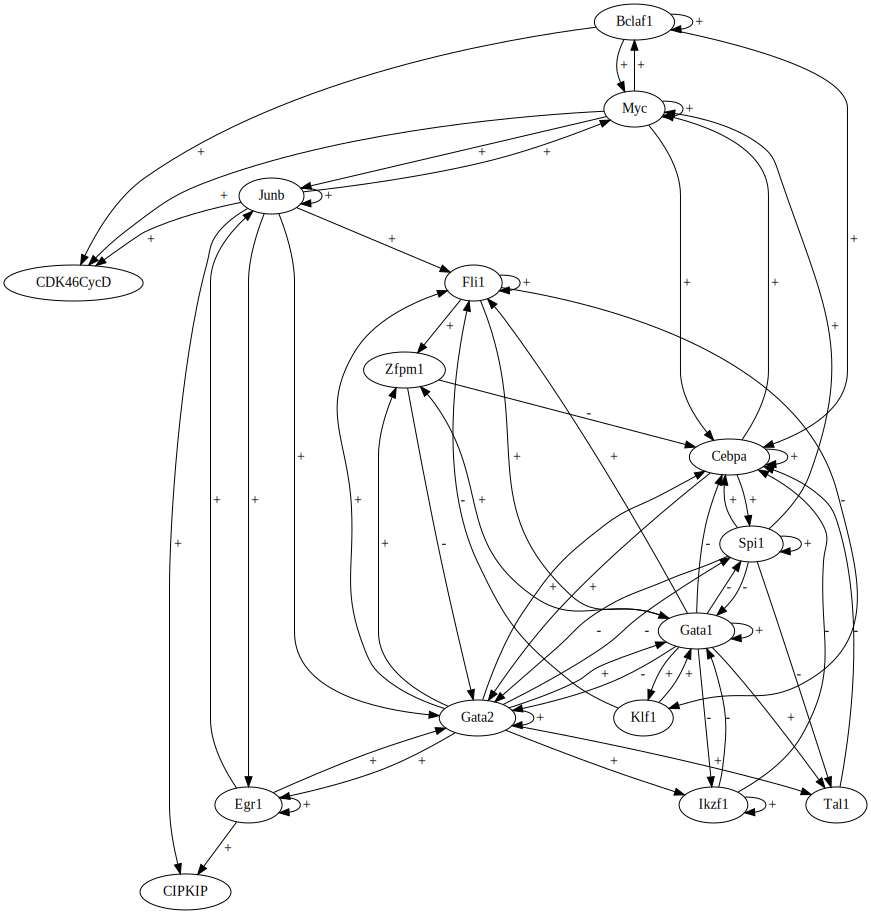

In [6]:
influenceGraphTable = pd.read_table("../influenceGraph/infGraphTable45.tsv")
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
len(influenceGraphTable)
    
# Loading constraints
    
# Creating influence graph
inf = []
for r in influenceGraphTable.index:
    inf.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))


#inf.remove(('Junb', 'Gata2', {'sign': 1})) #  no trust in auto neg from scenic 

dom0 = bonesis.InfluenceGraph(inf, maxclause = 3,exact=False)
allEdges = funForBonesis.multiDiGraphToEdgeList(dom0)
dom0
#inf.append(('Gata1', 'CDK46CycD', {'sign': 1})) # in litt and in Scenic in 42 runs    

dom = bonesis.InfluenceGraph(inf, maxclause = 3,exact=True)


#len(dom.edges())

dom

In [7]:
len(inf)

60

## Definition of the dynamical constraints with Bonesis
Our goal is to obtain a Boolean network relying on the input influence graph able to reproduce the dynamics observed in the scRNA seq analysis (pseudotrajectory analysis) 

In [8]:
dom = bonesis.InfluenceGraph(inf,exact=False, maxclause = 3)
dom
bo = bonesis.BoNesis(dom, data)
bo.settings["parallel"] = 24

fLymph = bo.fixed(~bo.obs("pLymph"))
fEr = bo.fixed(~bo.obs("pEr"));
fMk = bo.fixed(~bo.obs("pMk"));
fNeuMast = bo.fixed(~bo.obs("pNeuMast"));
start = ~bo.obs("iHSC")

start >= ~bo.obs("srHSC")
start >= ~bo.obs("qHSC")
start >= fLymph
start >= ~bo.obs("preDiff") >= fEr
start >= ~bo.obs("preDiff") >= fMk
start >= ~bo.obs("preDiff") >= fNeuMast

~bo.obs("srHSC") >= start
~bo.obs("qHSC") >= start
~bo.obs("preDiff") / ~bo.obs("qHSC")
~bo.obs("preDiff") / ~bo.obs("srHSC")
~bo.obs("preDiff") / start
~bo.obs('zero') / fNeuMast
~bo.obs('zero') / fMk
~bo.obs('zero') / fEr

~bo.obs('zero') / fLymph
~bo.obs("iHSC") >> "fixpoints" ^ {bo.obs(obs) for obs in ["pLymph", "pNeuMast","pEr","pMk","zero"]};


We can save the encoded problem in asp

In [9]:
view = bo.boolean_networks()
view.standalone(output_filename="test.asp")


## Inference of a diverse subset of solutions
We infer Boolean network solutions of our problem by imposing diversity among our solutions and discarding solutions with cyclic attractors because we assume that the biological system does not exhibit oscillatory behaviors.

In [ ]:
solutions = []
for bn in bo.diverse_boolean_networks(): 
    if(funForBonesis.has_cyclic(bn)):
        print("HAS CYCLIC ATTRACTORS, IGNORING")
        continue
    if len(solutions) > 10000:
        break
    solutions.append(bn)
    print(len(solutions))
print(len(solutions))

Grounding...done in 0.1s
Found 1 solutions in 1.2s (first in 1.2s; rate 1.2s)1
Found 2 solutions in 5.9s (first in 1.2s; rate 3.0s)2
Found 3 solutions in 6.1s (first in 1.2s; rate 2.0s)3
Found 4 solutions in 6.3s (first in 1.2s; rate 1.6s)4
Found 5 solutions in 6.5s (first in 1.2s; rate 1.3s)5
Found 6 solutions in 6.7s (first in 1.2s; rate 1.1s)6
Found 7 solutions in 6.8s (first in 1.2s; rate 1.0s)7
Found 8 solutions in 7.0s (first in 1.2s; rate 0.9s)8
Found 9 solutions in 7.3s (first in 1.2s; rate 0.8s)9
Found 10 solutions in 7.5s (first in 1.2s; rate 0.7s)10
Found 11 solutions in 7.9s (first in 1.2s; rate 0.7s)11
Found 12 solutions in 8.1s (first in 1.2s; rate 0.7s)12
Found 13 solutions in 8.3s (first in 1.2s; rate 0.6s)13
Found 14 solutions in 8.5s (first in 1.2s; rate 0.6s)14
Found 15 solutions in 8.7s (first in 1.2s; rate 0.6s)15
Found 16 solutions in 8.9s (first in 1.2s; rate 0.6s)16
Found 17 solutions in 9.1s (first in 1.2s; rate 0.5s)17
Found 18 solutions in 9.4s (first in 1.2s

Found 143 solutions in 54.6s (first in 1.2s; rate 0.4s)143
Found 144 solutions in 55.2s (first in 1.2s; rate 0.4s)144
Found 145 solutions in 55.8s (first in 1.2s; rate 0.4s)145
Found 146 solutions in 56.4s (first in 1.2s; rate 0.4s)146
Found 147 solutions in 56.9s (first in 1.2s; rate 0.4s)147
Found 148 solutions in 57.5s (first in 1.2s; rate 0.4s)148
Found 149 solutions in 58.1s (first in 1.2s; rate 0.4s)149
Found 150 solutions in 58.7s (first in 1.2s; rate 0.4s)150
Found 151 solutions in 59.3s (first in 1.2s; rate 0.4s)151
Found 152 solutions in 59.9s (first in 1.2s; rate 0.4s)152
Found 153 solutions in 60.5s (first in 1.2s; rate 0.4s)153
Found 154 solutions in 61.1s (first in 1.2s; rate 0.4s)154
Found 155 solutions in 61.7s (first in 1.2s; rate 0.4s)155
Found 156 solutions in 62.4s (first in 1.2s; rate 0.4s)156
Found 157 solutions in 63.1s (first in 1.2s; rate 0.4s)157
Found 158 solutions in 63.7s (first in 1.2s; rate 0.4s)158
Found 159 solutions in 64.3s (first in 1.2s; rate 0.4s)1

Found 280 solutions in 192.5s (first in 1.2s; rate 0.7s)280
Found 281 solutions in 194.2s (first in 1.2s; rate 0.7s)281
Found 282 solutions in 195.6s (first in 1.2s; rate 0.7s)282
Found 283 solutions in 197.2s (first in 1.2s; rate 0.7s)283
Found 284 solutions in 198.8s (first in 1.2s; rate 0.7s)284
Found 285 solutions in 200.5s (first in 1.2s; rate 0.7s)285
Found 286 solutions in 202.1s (first in 1.2s; rate 0.7s)286
Found 287 solutions in 203.6s (first in 1.2s; rate 0.7s)287
Found 288 solutions in 205.3s (first in 1.2s; rate 0.7s)288
Found 289 solutions in 207.1s (first in 1.2s; rate 0.7s)289
Found 290 solutions in 208.8s (first in 1.2s; rate 0.7s)290
Found 291 solutions in 210.3s (first in 1.2s; rate 0.7s)291
Found 292 solutions in 211.9s (first in 1.2s; rate 0.7s)292
Found 293 solutions in 213.5s (first in 1.2s; rate 0.7s)293
Found 294 solutions in 215.2s (first in 1.2s; rate 0.7s)294
Found 295 solutions in 216.7s (first in 1.2s; rate 0.7s)295
Found 296 solutions in 218.2s (first in 

Found 416 solutions in 478.8s (first in 1.2s; rate 1.2s)416
Found 417 solutions in 481.2s (first in 1.2s; rate 1.2s)417
Found 418 solutions in 483.8s (first in 1.2s; rate 1.2s)418
Found 419 solutions in 486.2s (first in 1.2s; rate 1.2s)419
Found 420 solutions in 488.8s (first in 1.2s; rate 1.2s)420
Found 421 solutions in 491.5s (first in 1.2s; rate 1.2s)421
Found 422 solutions in 494.4s (first in 1.2s; rate 1.2s)422
Found 423 solutions in 497.3s (first in 1.2s; rate 1.2s)423
Found 424 solutions in 499.9s (first in 1.2s; rate 1.2s)424
Found 425 solutions in 502.6s (first in 1.2s; rate 1.2s)425
Found 426 solutions in 505.6s (first in 1.2s; rate 1.2s)426
Found 427 solutions in 508.3s (first in 1.2s; rate 1.2s)427
Found 428 solutions in 511.0s (first in 1.2s; rate 1.2s)428
Found 429 solutions in 513.9s (first in 1.2s; rate 1.2s)429
Found 430 solutions in 516.9s (first in 1.2s; rate 1.2s)430
Found 431 solutions in 520.0s (first in 1.2s; rate 1.2s)431
Found 432 solutions in 523.1s (first in 

Found 552 solutions in 926.0s (first in 1.2s; rate 1.7s)552
Found 553 solutions in 929.7s (first in 1.2s; rate 1.7s)553
Found 554 solutions in 934.1s (first in 1.2s; rate 1.7s)554
Found 555 solutions in 937.8s (first in 1.2s; rate 1.7s)555
Found 556 solutions in 941.5s (first in 1.2s; rate 1.7s)556
Found 557 solutions in 945.6s (first in 1.2s; rate 1.7s)557
Found 558 solutions in 949.8s (first in 1.2s; rate 1.7s)558
Found 559 solutions in 953.5s (first in 1.2s; rate 1.7s)559
Found 560 solutions in 957.2s (first in 1.2s; rate 1.7s)560
Found 561 solutions in 961.2s (first in 1.2s; rate 1.7s)561
Found 562 solutions in 965.3s (first in 1.2s; rate 1.7s)562
Found 563 solutions in 969.3s (first in 1.2s; rate 1.7s)563
Found 564 solutions in 973.0s (first in 1.2s; rate 1.7s)564
Found 565 solutions in 976.7s (first in 1.2s; rate 1.7s)565
Found 566 solutions in 980.7s (first in 1.2s; rate 1.7s)566
Found 567 solutions in 984.7s (first in 1.2s; rate 1.7s)567
Found 568 solutions in 988.7s (first in 

Found 686 solutions in 1540.0s (first in 1.2s; rate 2.2s)686
Found 687 solutions in 1545.4s (first in 1.2s; rate 2.2s)687
Found 688 solutions in 1550.4s (first in 1.2s; rate 2.3s)688
Found 689 solutions in 1556.2s (first in 1.2s; rate 2.3s)689
Found 690 solutions in 1561.5s (first in 1.2s; rate 2.3s)690
Found 691 solutions in 1566.8s (first in 1.2s; rate 2.3s)691
Found 692 solutions in 1572.2s (first in 1.2s; rate 2.3s)692
Found 693 solutions in 1577.6s (first in 1.2s; rate 2.3s)693
Found 694 solutions in 1582.8s (first in 1.2s; rate 2.3s)694
Found 695 solutions in 1588.4s (first in 1.2s; rate 2.3s)695
Found 696 solutions in 1593.8s (first in 1.2s; rate 2.3s)696
Found 697 solutions in 1599.3s (first in 1.2s; rate 2.3s)697
Found 698 solutions in 1605.0s (first in 1.2s; rate 2.3s)698
Found 699 solutions in 1610.6s (first in 1.2s; rate 2.3s)699
Found 700 solutions in 1616.3s (first in 1.2s; rate 2.3s)700
Found 701 solutions in 1621.8s (first in 1.2s; rate 2.3s)701
Found 702 solutions in 1

Found 820 solutions in 2360.3s (first in 1.2s; rate 2.9s)820
Found 821 solutions in 2367.6s (first in 1.2s; rate 2.9s)821
Found 822 solutions in 2374.4s (first in 1.2s; rate 2.9s)822
Found 823 solutions in 2381.1s (first in 1.2s; rate 2.9s)823
Found 824 solutions in 2388.0s (first in 1.2s; rate 2.9s)824
Found 825 solutions in 2395.0s (first in 1.2s; rate 2.9s)825
Found 826 solutions in 2402.2s (first in 1.2s; rate 2.9s)826
Found 827 solutions in 2409.4s (first in 1.2s; rate 2.9s)827
Found 828 solutions in 2416.6s (first in 1.2s; rate 2.9s)828
Found 829 solutions in 2423.3s (first in 1.2s; rate 2.9s)829
Found 830 solutions in 2430.2s (first in 1.2s; rate 2.9s)830
Found 831 solutions in 2437.3s (first in 1.2s; rate 2.9s)831
Found 832 solutions in 2444.4s (first in 1.2s; rate 2.9s)832
Found 833 solutions in 2451.2s (first in 1.2s; rate 2.9s)833
Found 834 solutions in 2458.2s (first in 1.2s; rate 2.9s)834
Found 835 solutions in 2465.2s (first in 1.2s; rate 3.0s)835
Found 836 solutions in 2

Found 954 solutions in 3386.6s (first in 1.2s; rate 3.5s)954
Found 955 solutions in 3395.1s (first in 1.2s; rate 3.6s)955
Found 956 solutions in 3403.5s (first in 1.2s; rate 3.6s)956
Found 957 solutions in 3411.9s (first in 1.2s; rate 3.6s)957
Found 958 solutions in 3420.3s (first in 1.2s; rate 3.6s)958
Found 959 solutions in 3429.0s (first in 1.2s; rate 3.6s)959
Found 960 solutions in 3437.4s (first in 1.2s; rate 3.6s)960
Found 961 solutions in 3446.1s (first in 1.2s; rate 3.6s)961
Found 962 solutions in 3454.9s (first in 1.2s; rate 3.6s)962
Found 963 solutions in 3463.7s (first in 1.2s; rate 3.6s)963
Found 964 solutions in 3472.1s (first in 1.2s; rate 3.6s)964
Found 965 solutions in 3481.0s (first in 1.2s; rate 3.6s)965
Found 966 solutions in 3489.6s (first in 1.2s; rate 3.6s)966
Found 967 solutions in 3498.1s (first in 1.2s; rate 3.6s)967
Found 968 solutions in 3506.2s (first in 1.2s; rate 3.6s)968
Found 969 solutions in 3514.5s (first in 1.2s; rate 3.6s)969
Found 970 solutions in 3

Found 1085 solutions in 4592.1s (first in 1.2s; rate 4.2s)1085
Found 1086 solutions in 4602.0s (first in 1.2s; rate 4.2s)1086
Found 1087 solutions in 4612.0s (first in 1.2s; rate 4.2s)1087
Found 1088 solutions in 4622.3s (first in 1.2s; rate 4.2s)1088
Found 1089 solutions in 4632.6s (first in 1.2s; rate 4.3s)1089
Found 1090 solutions in 4642.7s (first in 1.2s; rate 4.3s)1090
Found 1091 solutions in 4652.8s (first in 1.2s; rate 4.3s)1091
Found 1092 solutions in 4663.0s (first in 1.2s; rate 4.3s)1092
Found 1093 solutions in 4673.1s (first in 1.2s; rate 4.3s)1093
Found 1094 solutions in 4682.9s (first in 1.2s; rate 4.3s)1094
Found 1095 solutions in 4692.7s (first in 1.2s; rate 4.3s)1095
Found 1096 solutions in 4703.1s (first in 1.2s; rate 4.3s)1096
Found 1097 solutions in 4713.6s (first in 1.2s; rate 4.3s)1097
Found 1098 solutions in 4723.8s (first in 1.2s; rate 4.3s)1098
Found 1099 solutions in 4733.6s (first in 1.2s; rate 4.3s)1099
Found 1100 solutions in 4744.0s (first in 1.2s; rate 4.

Found 1215 solutions in 6016.5s (first in 1.2s; rate 5.0s)1215
Found 1216 solutions in 6028.7s (first in 1.2s; rate 5.0s)1216
Found 1217 solutions in 6040.8s (first in 1.2s; rate 5.0s)1217
Found 1218 solutions in 6052.5s (first in 1.2s; rate 5.0s)1218
Found 1219 solutions in 6064.6s (first in 1.2s; rate 5.0s)1219
Found 1220 solutions in 6076.9s (first in 1.2s; rate 5.0s)1220
Found 1221 solutions in 6089.2s (first in 1.2s; rate 5.0s)1221
Found 1222 solutions in 6101.3s (first in 1.2s; rate 5.0s)1222
Found 1223 solutions in 6113.3s (first in 1.2s; rate 5.0s)1223
Found 1224 solutions in 6125.2s (first in 1.2s; rate 5.0s)1224
Found 1225 solutions in 6136.8s (first in 1.2s; rate 5.0s)1225
Found 1226 solutions in 6148.8s (first in 1.2s; rate 5.0s)1226
Found 1227 solutions in 6160.7s (first in 1.2s; rate 5.0s)1227
Found 1228 solutions in 6172.7s (first in 1.2s; rate 5.0s)1228
Found 1229 solutions in 6184.2s (first in 1.2s; rate 5.0s)1229
Found 1230 solutions in 6196.2s (first in 1.2s; rate 5.

Found 1345 solutions in 7672.2s (first in 1.2s; rate 5.7s)1345
Found 1346 solutions in 7686.2s (first in 1.2s; rate 5.7s)1346
Found 1347 solutions in 7700.1s (first in 1.2s; rate 5.7s)1347
Found 1348 solutions in 7713.7s (first in 1.2s; rate 5.7s)1348
Found 1349 solutions in 7727.5s (first in 1.2s; rate 5.7s)1349
Found 1350 solutions in 7741.5s (first in 1.2s; rate 5.7s)1350
Found 1351 solutions in 7755.0s (first in 1.2s; rate 5.7s)1351
Found 1352 solutions in 7768.8s (first in 1.2s; rate 5.7s)1352
Found 1353 solutions in 7781.9s (first in 1.2s; rate 5.8s)1353
Found 1354 solutions in 7795.7s (first in 1.2s; rate 5.8s)1354
Found 1355 solutions in 7809.1s (first in 1.2s; rate 5.8s)1355
Found 1356 solutions in 7822.8s (first in 1.2s; rate 5.8s)1356
Found 1357 solutions in 7837.4s (first in 1.2s; rate 5.8s)1357
Found 1358 solutions in 7851.0s (first in 1.2s; rate 5.8s)1358
Found 1359 solutions in 7864.9s (first in 1.2s; rate 5.8s)1359
Found 1360 solutions in 7878.6s (first in 1.2s; rate 5.

Found 1475 solutions in 9584.6s (first in 1.2s; rate 6.5s)1475
Found 1476 solutions in 9599.7s (first in 1.2s; rate 6.5s)1476
Found 1477 solutions in 9616.1s (first in 1.2s; rate 6.5s)1477
Found 1478 solutions in 9632.0s (first in 1.2s; rate 6.5s)1478
Found 1479 solutions in 9648.0s (first in 1.2s; rate 6.5s)1479
Found 1480 solutions in 9663.8s (first in 1.2s; rate 6.5s)1480
Found 1481 solutions in 9679.2s (first in 1.2s; rate 6.5s)1481
Found 1482 solutions in 9695.1s (first in 1.2s; rate 6.5s)1482
Found 1483 solutions in 9710.2s (first in 1.2s; rate 6.5s)1483
Found 1484 solutions in 9726.1s (first in 1.2s; rate 6.6s)1484
Found 1485 solutions in 9741.9s (first in 1.2s; rate 6.6s)1485
Found 1486 solutions in 9758.3s (first in 1.2s; rate 6.6s)1486
Found 1487 solutions in 9774.4s (first in 1.2s; rate 6.6s)1487
Found 1488 solutions in 9790.4s (first in 1.2s; rate 6.6s)1488
Found 1489 solutions in 9806.1s (first in 1.2s; rate 6.6s)1489
Found 1490 solutions in 9822.4s (first in 1.2s; rate 6.

Found 1603 solutions in 11736.5s (first in 1.2s; rate 7.3s)1603
Found 1604 solutions in 11754.9s (first in 1.2s; rate 7.3s)1604
Found 1605 solutions in 11772.9s (first in 1.2s; rate 7.3s)1605
Found 1606 solutions in 11791.2s (first in 1.2s; rate 7.3s)1606
Found 1607 solutions in 11809.1s (first in 1.2s; rate 7.3s)1607
Found 1608 solutions in 11826.7s (first in 1.2s; rate 7.4s)1608
Found 1609 solutions in 11844.5s (first in 1.2s; rate 7.4s)1609
Found 1610 solutions in 11862.7s (first in 1.2s; rate 7.4s)1610
Found 1611 solutions in 11880.4s (first in 1.2s; rate 7.4s)1611
Found 1612 solutions in 11899.0s (first in 1.2s; rate 7.4s)1612
Found 1613 solutions in 11917.0s (first in 1.2s; rate 7.4s)1613
Found 1614 solutions in 11935.2s (first in 1.2s; rate 7.4s)1614
Found 1615 solutions in 11953.6s (first in 1.2s; rate 7.4s)1615
Found 1616 solutions in 11972.1s (first in 1.2s; rate 7.4s)1616
Found 1617 solutions in 11990.2s (first in 1.2s; rate 7.4s)1617
Found 1618 solutions in 12008.5s (first 

Found 1731 solutions in 14160.0s (first in 1.2s; rate 8.2s)1731
Found 1732 solutions in 14179.6s (first in 1.2s; rate 8.2s)1732
Found 1733 solutions in 14200.4s (first in 1.2s; rate 8.2s)1733
Found 1734 solutions in 14220.1s (first in 1.2s; rate 8.2s)1734
Found 1735 solutions in 14240.2s (first in 1.2s; rate 8.2s)1735
Found 1736 solutions in 14260.2s (first in 1.2s; rate 8.2s)1736
Found 1737 solutions in 14280.4s (first in 1.2s; rate 8.2s)1737
Found 1738 solutions in 14301.2s (first in 1.2s; rate 8.2s)1738
Found 1739 solutions in 14321.6s (first in 1.2s; rate 8.2s)1739
Found 1740 solutions in 14342.0s (first in 1.2s; rate 8.2s)1740
Found 1741 solutions in 14362.1s (first in 1.2s; rate 8.2s)1741
Found 1742 solutions in 14381.9s (first in 1.2s; rate 8.3s)1742
Found 1743 solutions in 14402.2s (first in 1.2s; rate 8.3s)1743
Found 1744 solutions in 14422.9s (first in 1.2s; rate 8.3s)1744
Found 1745 solutions in 14443.4s (first in 1.2s; rate 8.3s)1745
Found 1746 solutions in 14463.5s (first 

Found 1859 solutions in 16880.7s (first in 1.2s; rate 9.1s)1859
Found 1860 solutions in 16902.3s (first in 1.2s; rate 9.1s)1860
Found 1861 solutions in 16923.8s (first in 1.2s; rate 9.1s)1861
Found 1862 solutions in 16946.1s (first in 1.2s; rate 9.1s)1862
Found 1863 solutions in 16969.3s (first in 1.2s; rate 9.1s)1863
Found 1864 solutions in 16992.3s (first in 1.2s; rate 9.1s)1864
Found 1865 solutions in 17014.7s (first in 1.2s; rate 9.1s)1865
Found 1866 solutions in 17037.2s (first in 1.2s; rate 9.1s)1866
Found 1867 solutions in 17059.9s (first in 1.2s; rate 9.1s)1867
Found 1868 solutions in 17082.3s (first in 1.2s; rate 9.1s)1868
Found 1869 solutions in 17104.7s (first in 1.2s; rate 9.2s)1869
Found 1870 solutions in 17127.6s (first in 1.2s; rate 9.2s)1870
Found 1871 solutions in 17150.5s (first in 1.2s; rate 9.2s)1871
Found 1872 solutions in 17173.3s (first in 1.2s; rate 9.2s)1872
Found 1873 solutions in 17196.1s (first in 1.2s; rate 9.2s)1873
Found 1874 solutions in 17218.7s (first 

Found 1986 solutions in 19886.6s (first in 1.2s; rate 10.0s)1986
Found 1987 solutions in 19911.5s (first in 1.2s; rate 10.0s)1987
Found 1988 solutions in 19936.6s (first in 1.2s; rate 10.0s)1988
Found 1989 solutions in 19962.0s (first in 1.2s; rate 10.0s)1989
Found 1990 solutions in 19987.0s (first in 1.2s; rate 10.0s)1990
Found 1991 solutions in 20012.7s (first in 1.2s; rate 10.1s)1991
Found 1992 solutions in 20037.0s (first in 1.2s; rate 10.1s)1992
Found 1993 solutions in 20062.7s (first in 1.2s; rate 10.1s)1993
Found 1994 solutions in 20087.6s (first in 1.2s; rate 10.1s)1994
Found 1995 solutions in 20112.4s (first in 1.2s; rate 10.1s)1995
Found 1996 solutions in 20137.0s (first in 1.2s; rate 10.1s)1996
Found 1997 solutions in 20163.5s (first in 1.2s; rate 10.1s)1997
Found 1998 solutions in 20188.9s (first in 1.2s; rate 10.1s)1998
Found 1999 solutions in 20213.9s (first in 1.2s; rate 10.1s)1999
Found 2000 solutions in 20238.9s (first in 1.2s; rate 10.1s)2000
Found 2001 solutions in 2

Found 2112 solutions in 23183.6s (first in 1.2s; rate 11.0s)2112
Found 2113 solutions in 23211.2s (first in 1.2s; rate 11.0s)2113
Found 2114 solutions in 23239.4s (first in 1.2s; rate 11.0s)2114
Found 2115 solutions in 23266.9s (first in 1.2s; rate 11.0s)2115
Found 2116 solutions in 23294.6s (first in 1.2s; rate 11.0s)2116
Found 2117 solutions in 23322.3s (first in 1.2s; rate 11.0s)2117
Found 2118 solutions in 23349.1s (first in 1.2s; rate 11.0s)2118
Found 2119 solutions in 23376.9s (first in 1.2s; rate 11.0s)2119
Found 2120 solutions in 23404.1s (first in 1.2s; rate 11.0s)2120
Found 2121 solutions in 23431.6s (first in 1.2s; rate 11.0s)2121
Found 2122 solutions in 23459.4s (first in 1.2s; rate 11.1s)2122
Found 2123 solutions in 23486.6s (first in 1.2s; rate 11.1s)2123
Found 2124 solutions in 23513.8s (first in 1.2s; rate 11.1s)2124
Found 2125 solutions in 23541.5s (first in 1.2s; rate 11.1s)2125
Found 2126 solutions in 23569.3s (first in 1.2s; rate 11.1s)2126
Found 2127 solutions in 2

Found 2238 solutions in 26802.8s (first in 1.2s; rate 12.0s)2238
Found 2239 solutions in 26832.4s (first in 1.2s; rate 12.0s)2239
Found 2240 solutions in 26862.9s (first in 1.2s; rate 12.0s)2240
Found 2241 solutions in 26892.6s (first in 1.2s; rate 12.0s)2241
Found 2242 solutions in 26922.4s (first in 1.2s; rate 12.0s)2242
Found 2243 solutions in 26951.5s (first in 1.2s; rate 12.0s)2243
Found 2244 solutions in 26981.0s (first in 1.2s; rate 12.0s)2244
Found 2245 solutions in 27010.9s (first in 1.2s; rate 12.0s)2245
Found 2246 solutions in 27040.5s (first in 1.2s; rate 12.0s)2246
Found 2247 solutions in 27070.4s (first in 1.2s; rate 12.0s)2247
Found 2248 solutions in 27100.7s (first in 1.2s; rate 12.1s)2248
Found 2249 solutions in 27130.9s (first in 1.2s; rate 12.1s)2249
Found 2250 solutions in 27161.4s (first in 1.2s; rate 12.1s)2250
Found 2251 solutions in 27191.6s (first in 1.2s; rate 12.1s)2251
Found 2252 solutions in 27221.8s (first in 1.2s; rate 12.1s)2252
Found 2253 solutions in 2

Found 2364 solutions in 30831.5s (first in 1.2s; rate 13.0s)2364
Found 2365 solutions in 30864.4s (first in 1.2s; rate 13.1s)2365
Found 2366 solutions in 30897.5s (first in 1.2s; rate 13.1s)2366
Found 2367 solutions in 30930.4s (first in 1.2s; rate 13.1s)2367
Found 2368 solutions in 30963.4s (first in 1.2s; rate 13.1s)2368
Found 2369 solutions in 30996.2s (first in 1.2s; rate 13.1s)2369
Found 2370 solutions in 31029.7s (first in 1.2s; rate 13.1s)2370
Found 2371 solutions in 31063.3s (first in 1.2s; rate 13.1s)2371
Found 2372 solutions in 31096.9s (first in 1.2s; rate 13.1s)2372
Found 2373 solutions in 31130.4s (first in 1.2s; rate 13.1s)2373
Found 2374 solutions in 31163.7s (first in 1.2s; rate 13.1s)2374
Found 2375 solutions in 31196.9s (first in 1.2s; rate 13.1s)2375
Found 2376 solutions in 31230.3s (first in 1.2s; rate 13.1s)2376
Found 2377 solutions in 31264.7s (first in 1.2s; rate 13.2s)2377
Found 2378 solutions in 31299.0s (first in 1.2s; rate 13.2s)2378
Found 2379 solutions in 3

Found 2490 solutions in 35224.0s (first in 1.2s; rate 14.1s)2490
Found 2491 solutions in 35260.2s (first in 1.2s; rate 14.2s)2491
Found 2492 solutions in 35296.5s (first in 1.2s; rate 14.2s)2492
Found 2493 solutions in 35333.9s (first in 1.2s; rate 14.2s)2493
Found 2494 solutions in 35370.4s (first in 1.2s; rate 14.2s)2494
Found 2495 solutions in 35405.9s (first in 1.2s; rate 14.2s)2495
Found 2496 solutions in 35442.0s (first in 1.2s; rate 14.2s)2496
Found 2497 solutions in 35478.6s (first in 1.2s; rate 14.2s)2497
Found 2498 solutions in 35514.9s (first in 1.2s; rate 14.2s)2498
Found 2499 solutions in 35552.6s (first in 1.2s; rate 14.2s)2499
Found 2500 solutions in 35589.3s (first in 1.2s; rate 14.2s)2500
Found 2501 solutions in 35625.6s (first in 1.2s; rate 14.2s)2501
Found 2502 solutions in 35661.6s (first in 1.2s; rate 14.3s)2502
Found 2503 solutions in 35697.1s (first in 1.2s; rate 14.3s)2503
Found 2504 solutions in 35733.9s (first in 1.2s; rate 14.3s)2504
Found 2505 solutions in 3

Found 2616 solutions in 39983.2s (first in 1.2s; rate 15.3s)2616
Found 2617 solutions in 40022.5s (first in 1.2s; rate 15.3s)2617
Found 2618 solutions in 40061.7s (first in 1.2s; rate 15.3s)2618
Found 2619 solutions in 40100.9s (first in 1.2s; rate 15.3s)2619
Found 2620 solutions in 40140.7s (first in 1.2s; rate 15.3s)2620
Found 2621 solutions in 40179.9s (first in 1.2s; rate 15.3s)2621
Found 2622 solutions in 40219.1s (first in 1.2s; rate 15.3s)2622
Found 2623 solutions in 40258.6s (first in 1.2s; rate 15.3s)2623
Found 2624 solutions in 40297.4s (first in 1.2s; rate 15.4s)2624
Found 2625 solutions in 40335.3s (first in 1.2s; rate 15.4s)2625
Found 2626 solutions in 40375.9s (first in 1.2s; rate 15.4s)2626
Found 2627 solutions in 40415.8s (first in 1.2s; rate 15.4s)2627
Found 2628 solutions in 40456.1s (first in 1.2s; rate 15.4s)2628
Found 2629 solutions in 40495.9s (first in 1.2s; rate 15.4s)2629
Found 2630 solutions in 40535.4s (first in 1.2s; rate 15.4s)2630
Found 2631 solutions in 4

Found 2742 solutions in 45140.7s (first in 1.2s; rate 16.5s)2742
Found 2743 solutions in 45184.4s (first in 1.2s; rate 16.5s)2743
Found 2744 solutions in 45226.9s (first in 1.2s; rate 16.5s)2744
Found 2745 solutions in 45269.6s (first in 1.2s; rate 16.5s)2745
Found 2746 solutions in 45311.6s (first in 1.2s; rate 16.5s)2746
Found 2747 solutions in 45353.5s (first in 1.2s; rate 16.5s)2747
Found 2748 solutions in 45396.7s (first in 1.2s; rate 16.5s)2748
Found 2749 solutions in 45439.5s (first in 1.2s; rate 16.5s)2749
Found 2750 solutions in 45483.0s (first in 1.2s; rate 16.5s)2750
Found 2751 solutions in 45526.8s (first in 1.2s; rate 16.5s)2751
Found 2752 solutions in 45570.1s (first in 1.2s; rate 16.6s)2752
Found 2753 solutions in 45613.2s (first in 1.2s; rate 16.6s)2753
Found 2754 solutions in 45656.0s (first in 1.2s; rate 16.6s)2754
Found 2755 solutions in 45699.3s (first in 1.2s; rate 16.6s)2755
Found 2756 solutions in 45742.4s (first in 1.2s; rate 16.6s)2756
Found 2757 solutions in 4

In [ ]:
len(solutions)

In [ ]:
solutions[2]

In [ ]:
table = pd.DataFrame(solutions)
for n in table.nunique().index:
    if table.nunique()[n] > 1:
        print(n)
        print(pd.DataFrame(table[n].unique())) 

In [ ]:
pd.DataFrame(solutions[2].attractors(reachable_from=data["iHSC"]))

## Exploring the behavior of solutions in the face of mutating perturbations

We define two functions to perform this analysis. Our strategy is to find for each of the solutions inferred, all reachable attractors from our initial iHSC state for a particular alteration (KO/KI). We performed this analysis for the KO of each of the TFs in the networks as well as the KI for the components that were found to be overactivated under aging conditions in previous studies.

In [ ]:
def testPerturb(model,perturbations,data):
    test_mut = model.copy()
    for perturbation in perturbations:
        del test_mut[[*perturbation.keys()][0]]
        test_mut[[*perturbation.keys()][0]] = [*perturbation.values()][0]
        data_mut = deepcopy(data)
        if ([*perturbation.values()][0] == 1) | ([*perturbation.values()][0] == 0):
            data_mut["iHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
    att = pd.DataFrame(test_mut.attractors(reachable_from=data_mut["iHSC"]))[geneOrder]
    return att

In [ ]:
def getMutAttractors(perturbations,sol,data):
    geneMut = list(perturbations[0].keys())[0]
    mut = []
    for s in solutions :
        if list(perturbations[0].values())[0] == 0 :
            koStr = "KO"
        else:
            koStr = "KI"
            

        possiblePhDf = pd.DataFrame(testPerturb(s,perturbations,data))
        possiblePhDf.sort_values(by= geneOrder, inplace=True)
        possiblePhDf.index = [str(i) for i in range(0,len(possiblePhDf))]
        possiblePh = possiblePhDf.to_dict() 
        if possiblePh not in mut:
            mut.append(possiblePh)
            
    possiblePhAll = pd.DataFrame(mut[0])
    possiblePhAll = possiblePhAll.rename(index=lambda s: geneMut + koStr + "_0" + "_" + s)
    i=1
    for a in mut[1:]:
        df = pd.DataFrame(a)
        df.index = [str(j) for j in range(0,len(df))]
        df = df.rename(index=lambda s: geneMut + koStr +"_"+ str(i) + "_" + s)
        possiblePhAll = possiblePhAll.append(df)

        i += 1

    return possiblePhAll



## Test all the KO mutations

In [ ]:
getMutAttractors(perturbations=[{"Spi1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Cebpa":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Junb":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Egr1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Gata2":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Gata1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Myc":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Ikzf1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Bclaf1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Tal1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Zfpm1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Klf1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Fli1":0}],sol=solutions,data = data)

## Test 2 KI mutations

In [ ]:
getMutAttractors(perturbations=[{"Junb":1}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Egr1":1}],sol=solutions,data = data)